In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
with zipfile.ZipFile('C:/Users/jahna/Downloads/archive (2).zip','r') as ext_all:
    with ext_all.open('train_u6lujuX_CVtuZ9i (1).csv') as f:
        df=pd.read_csv(f)
        
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
df=df.drop('Loan_ID',axis=1)

In [4]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Gender']=df['Gender'].ffill()

In [6]:
df['Married']=df['Married'].ffill()

In [7]:
df['Dependents']=df['Dependents'].replace('3+','3')
df['Dependents']=df['Dependents'].ffill()

In [8]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [9]:
df['Self_Employed']=df['Self_Employed'].ffill()
df['Credit_History']=df['Credit_History'].ffill()

In [10]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [11]:
row=df[df.duplicated()]
row

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [12]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


<Axes: xlabel='Loan_Status'>

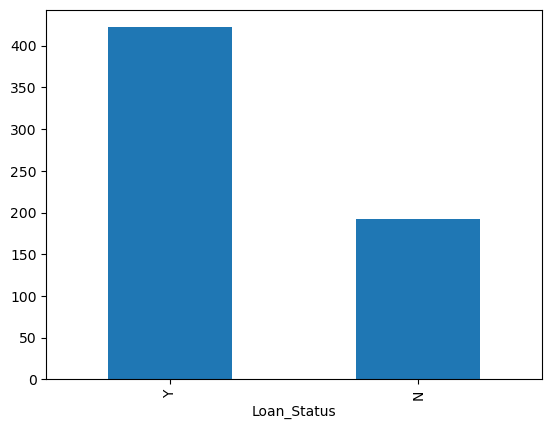

In [14]:
df['Loan_Status'].value_counts().plot(kind='bar')

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [16]:
'''Most of these people are married. So we can't fill Gender based on Married column.
Most of these people are graduated. So we can't fill Gender based on Education column.
Most of these people are self employed. So we can't fill Gender based on Self_Employed column.
Most of these people are having Credit_History and Loan_Amount_Term as 360 days(1 year).
Since we are going to predict applicant's Gender, we can omit CoapplicantIncome
So we are going predict the Gender based on Dependents, ApplicantIncome, LoanAmount, and Property_Area'''

"Most of these people are married. So we can't fill Gender based on Married column.\nMost of these people are graduated. So we can't fill Gender based on Education column.\nMost of these people are self employed. So we can't fill Gender based on Self_Employed column.\nMost of these people are having Credit_History and Loan_Amount_Term as 360 days(1 year).\nSince we are going to predict applicant's Gender, we can omit CoapplicantIncome\nSo we are going predict the Gender based on Dependents, ApplicantIncome, LoanAmount, and Property_Area"

In [17]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = df, hue = 'Married')
# plt.title('Married by Gender')
#plt.xlabel('Gender')
#plt.ylabel('Count')
#plt.legend(title='Married')
#plt.tight_layout()
# plt.show()


# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = df, hue = 'Dependents')
# plt.title('Dependents by Gender')
#plt.xlabel('Gender')
#plt.ylabel('Count')
#plt.legend(title='Dependents')
#plt.tight_layout()
# plt.show()


# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = df, hue = 'Education')
# plt.title('Education by Gender')
#plt.xlabel('Gender')
#plt.ylabel('Count')
#plt.legend(title='Education')
#plt.tight_layout()
# plt.show()


# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = df, hue = 'Self_Employed')
# plt.title('Self_Employed by Gender')
#plt.xlabel('Gender')
#plt.ylabel('Count')
#plt.legend(title='Self_Employed')
#plt.tight_layout()
# plt.show()



# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = df, hue = 'Loan_Amount_Term')
# plt.title('Loan_Amount_Term by Gender')
#plt.xlabel('Gender')
#plt.ylabel('Count')
#plt.legend(title='Loan_Amount_Term')
#plt.tight_layout()
# plt.show()


# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = df, hue = 'Credit_History')
# plt.title('Credit_History by Gender')
#plt.xlabel('Gender')
#plt.ylabel('Count')
#plt.legend(title='Credit_History')
#plt.tight_layout()
# plt.show()



# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = df, hue = 'Property_Area')
# plt.title('Property_Area by Gender')
#plt.xlabel('Gender')
#plt.ylabel('Count')
#plt.legend(title='Property_Area')
#plt.tight_layout()
# plt.show()


# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = df, hue = 'Loan_Status')
# plt.title('Loan_Status by Gender')
#plt.xlabel('Gender')
#plt.ylabel('Count')
#plt.tight_layout()
# plt.show()
 #like this i plot all th efreatures


C:\Users\jahna\AppData\Local\Temp\ipykernel_15900\621959134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], rug = True, bins = 100, color='r')


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

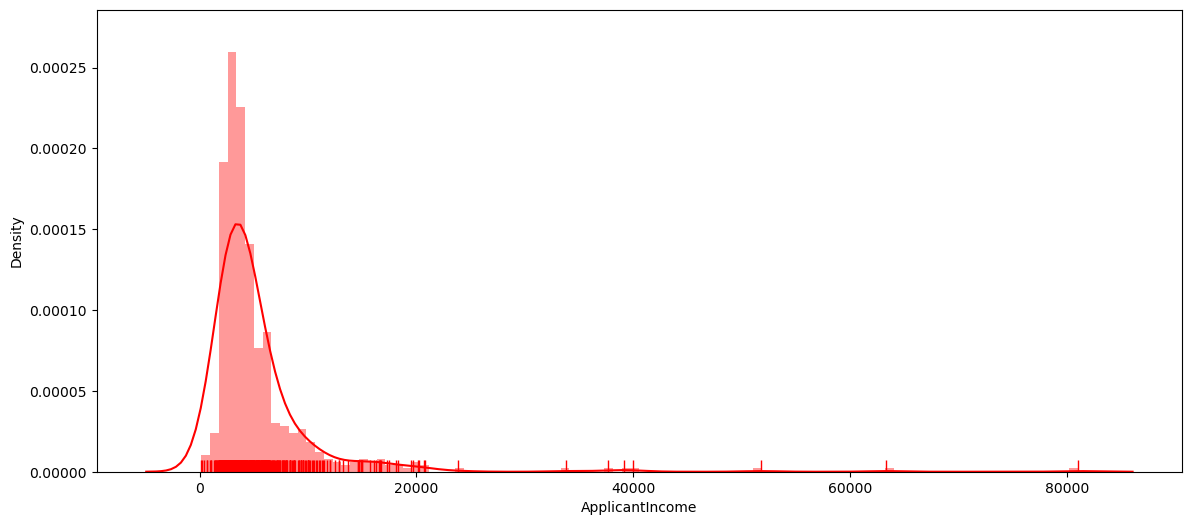

In [18]:
plt.figure(figsize = (14, 6))
sns.distplot(df['ApplicantIncome'], rug = True, bins = 100, color='r')
# plt.savefig('../images/ApplicantIncomeDistribution.png')

C:\Users\jahna\AppData\Local\Temp\ipykernel_15900\249521255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'], rug = True, color = 'r')


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

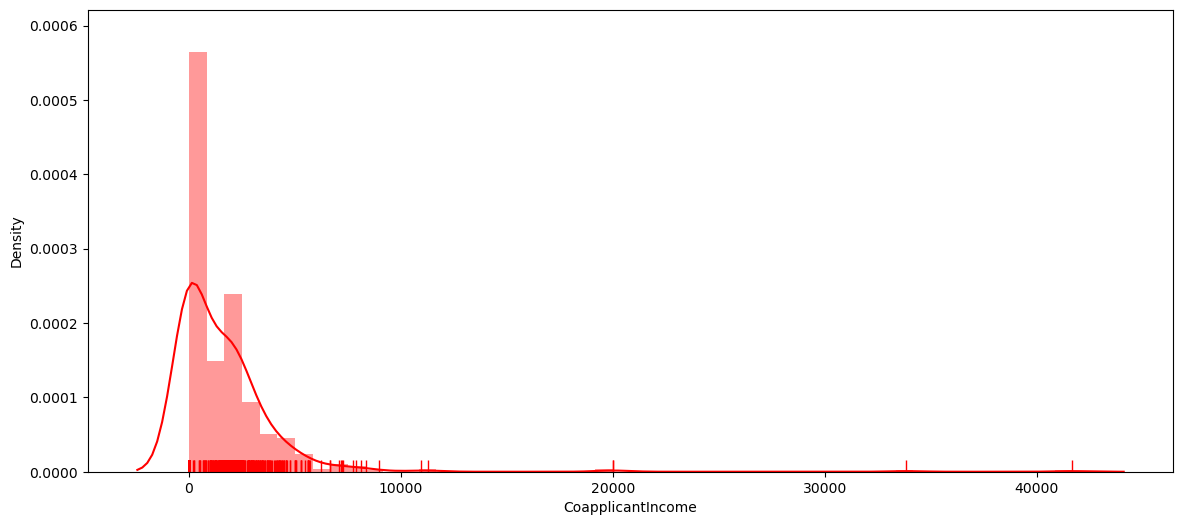

In [19]:
plt.figure(figsize = (14, 6))
sns.distplot(df['CoapplicantIncome'], rug = True, color = 'r')
# plt.savefig('../images/CoapplicantIncomeDistribution.png')

C:\Users\jahna\AppData\Local\Temp\ipykernel_15900\2956672703.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'], rug = True, color = 'r')


<Axes: xlabel='LoanAmount', ylabel='Density'>

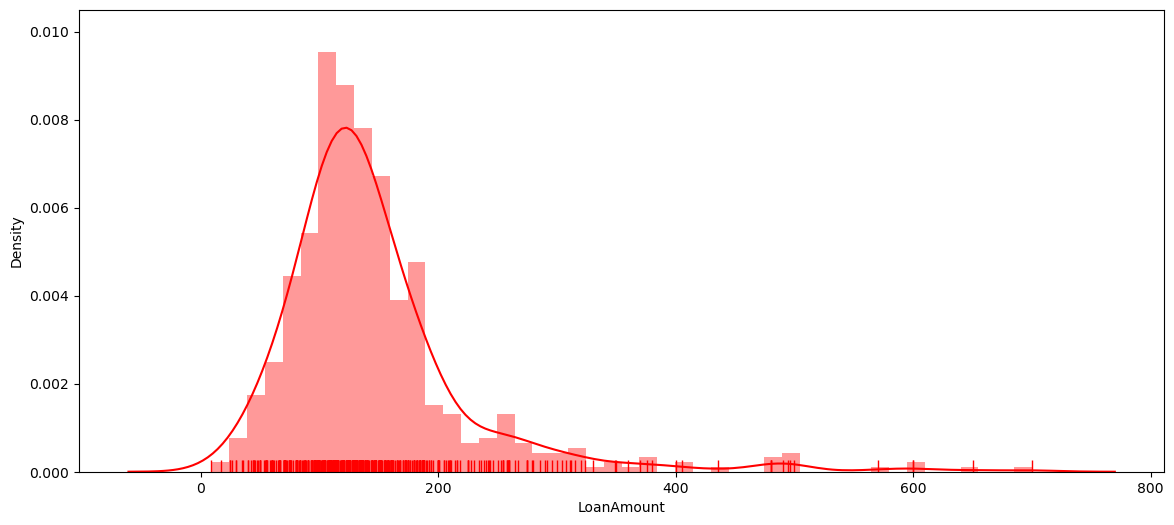

In [20]:
plt.figure(figsize = (14, 6))
sns.distplot(df['LoanAmount'], rug = True, color = 'r')

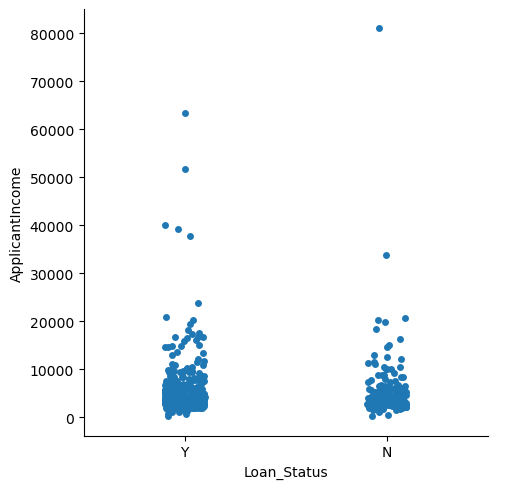

In [21]:
sns.catplot(x = 'Loan_Status', y = 'ApplicantIncome', data = df)


<Axes: ylabel='LoanAmount'>

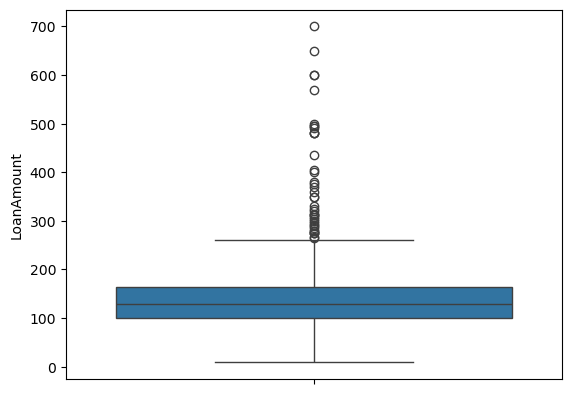

In [22]:
sns.boxplot(df['LoanAmount'])

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.835505
std,6109.041673,2926.248369,84.037468,64.372489,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [24]:

def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    cap_outliers(col)

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4617.111564,1419.702231,138.025354,342.000000,0.835505
std,2479.851729,1624.605892,55.773951,64.372489,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,10171.250000,5743.125000,261.500000,480.000000,1.000000


In [25]:
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
#there is no corelation between the applicantIncome,coapplicantIncome and creditHistory
#The loanAmount having applicantincome have more stronglly coreelated
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [27]:
df['Married']=np.where(df['Married']=='Yes',1,0)
df['Education']=np.where(df['Education']=='Graduate',1,0)
df['Self_Employed']=np.where(df['Self_Employed']=='Yes',1,0)
df = pd.concat([df.drop('Property_Area', axis=1), pd.get_dummies(df['Property_Area'], prefix='Property_Area', drop_first=True)], axis=1)
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})
df['Gender']=np.where(df['Gender']=='Male',1,0)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,Y,0,1
1,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,N,0,0
2,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,Y,0,1
3,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,Y,0,1
4,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,Y,0,1


In [28]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

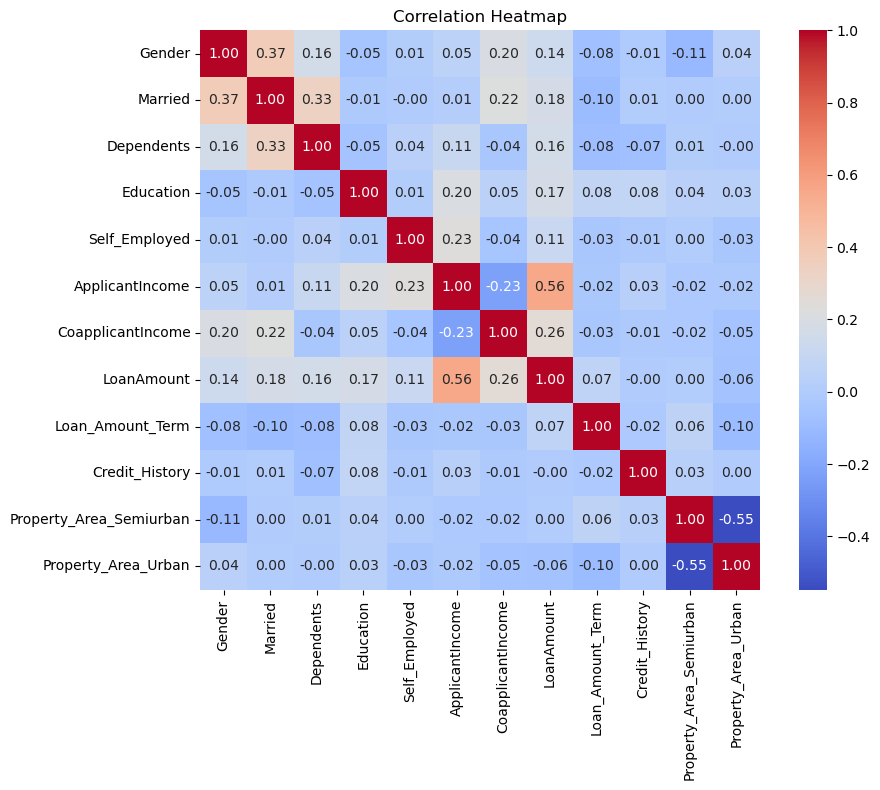

In [29]:
corr_matrix=x.corr()
corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [30]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900.0,0.0,71.000000,360.0,1.0,0,0
610,1,1,3,1,0,4106.0,0.0,40.000000,180.0,1.0,0,0
611,1,1,1,1,0,8072.0,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,1,0,7583.0,0.0,187.000000,360.0,1.0,0,1


In [31]:
y=np.where(y=='Y',1,0)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,1,0,4583.00,1508.000,128.0,360.0,1.0,0,0
394,1,1,2,1,0,3100.00,1400.000,113.0,360.0,1.0,0,1
316,1,1,2,1,0,3717.00,0.000,120.0,360.0,1.0,1,0
62,1,1,0,0,1,2609.00,3449.000,165.0,180.0,0.0,0,0
158,1,0,0,1,0,2980.00,2083.000,120.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
311,1,0,0,0,0,2927.00,2405.000,111.0,360.0,1.0,1,0
321,1,1,3,1,0,4342.00,189.000,124.0,360.0,1.0,1,0
327,1,1,0,1,1,5818.00,2160.000,184.0,360.0,1.0,1,0
506,1,1,0,1,0,10171.25,5743.125,261.5,360.0,1.0,0,1


In [33]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)


In [34]:
X_resampled.shape,y_resampled.shape

((632, 12), (632,))

Percentage Importance of each feature with respect to Loan_Status:

                         Importance
Feature                            
Credit_History            26.831690
ApplicantIncome           16.930635
LoanAmount                15.656809
CoapplicantIncome          9.219826
Loan_Amount_Term           6.584243
Dependents                 6.582264
Property_Area_Semiurban    5.911996
Education                  3.110666
Property_Area_Urban        2.780603
Married                    2.769385
Self_Employed              1.840694
Gender                     1.781190


C:\Users\jahna\AppData\Local\Temp\ipykernel_15900\3384275954.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


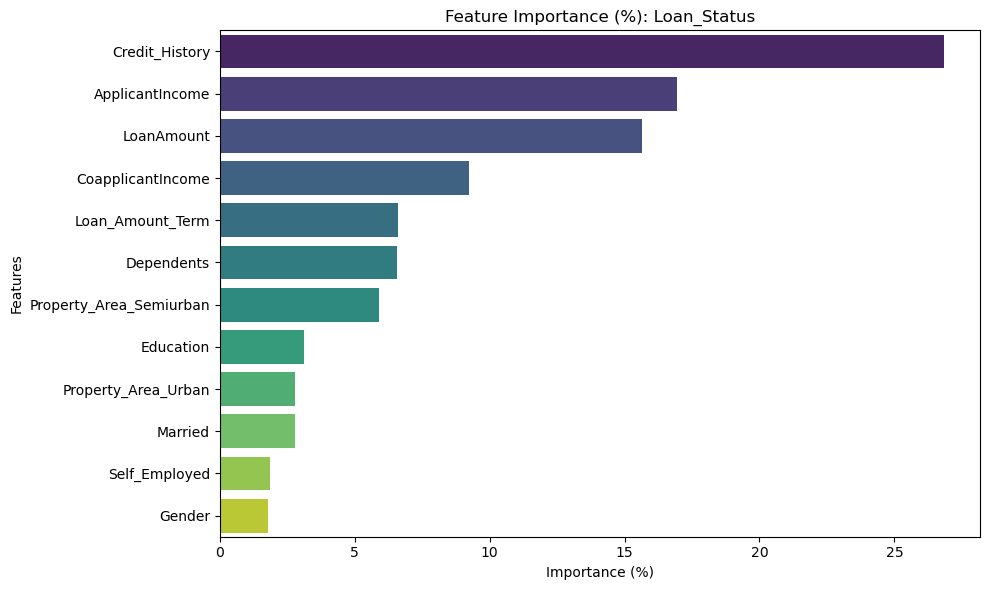

In [41]:
#Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
importances = model.feature_importances_
feature_names = X_resampled.columns


# Convert to DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances * 100  # Convert to percentage
}).sort_values(by='Importance', ascending=False)

# Print importance values
print("Percentage Importance of each feature with respect to Loan_Status:\n")
print(importance_df.set_index('Feature'))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (%): Loan_Status')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

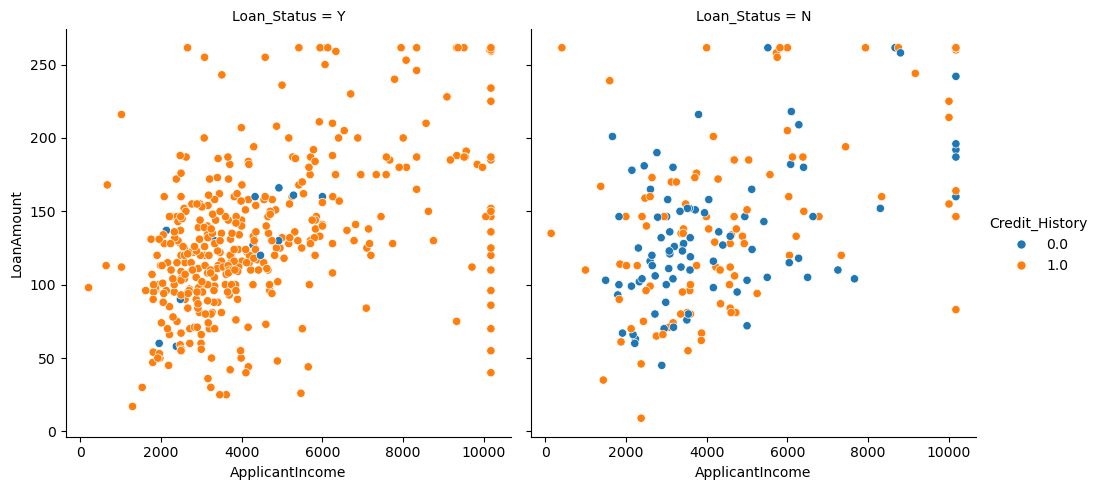

In [42]:

# TODO : Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status
sns.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = df,
           hue = 'Credit_History', col = 'Loan_Status')

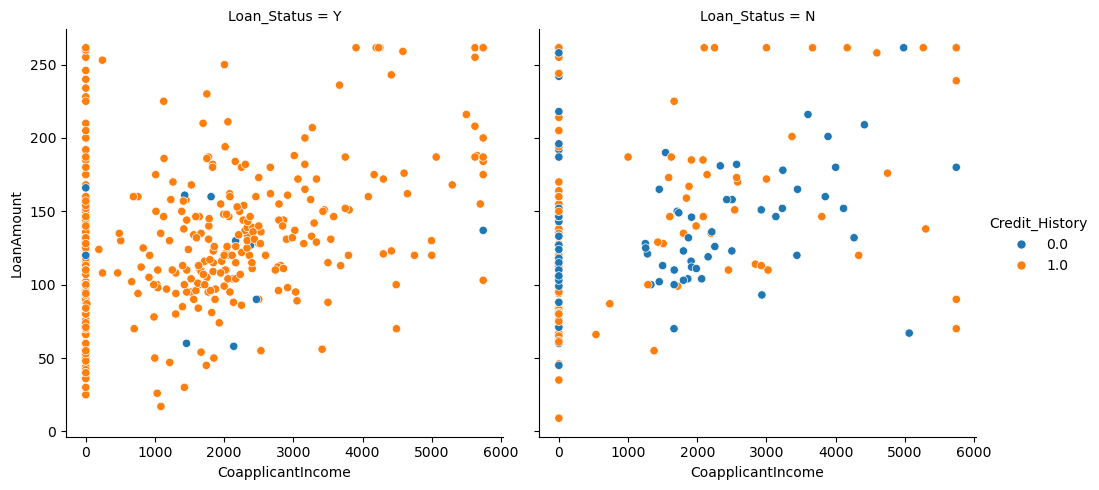

In [43]:

# TODO : Relation Between Credit_History, Loan_Amount and Coapplicant_Income with Loan_Status
sns.relplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = df,
           hue = 'Credit_History', col = 'Loan_Status')

In [44]:
# TODO : Arranging features based on their importance to the Loan_Status
prediction_features = pd.Series(importances*100, index = df.columns[:-1]).sort_values(ascending = False)

In [45]:
# TODO : Extracting Features name
prediction_features = prediction_features.index

In [46]:
prediction_features = prediction_features[:6]
prediction_features


Index(['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Dependents'],
      dtype='object')

In [47]:
X_train_top = X_resampled[prediction_features]
X_test_top = X_test[prediction_features]
X_resampled_top, y_resampled = smt.fit_resample(X_train_top, y_resampled)
model.fit(X_resampled_top, y_resampled)
y_pred = model.predict(X_test_top)

In [48]:

from sklearn.linear_model import LogisticRegression
logictic_model = LogisticRegression(max_iter = 200)
logictic_model.fit(X_train_top, y_resampled)

print("Training Accuracy : {}%".format(logictic_model.score(X_train_top, y_resampled) * 100))
print("Testing Accuracy  : {}%".format(logictic_model.score(X_test_top, y_test) * 100))

Training Accuracy : 74.20886075949366%
Testing Accuracy  : 84.4155844155844%


In [49]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced_subsample',
    random_state=42
)
model.fit(X_train_top, y_resampled)
print("Training Accuracy : {}%".format(model.score(X_train_top, y_resampled) * 100))
print("Testing Accuracy  : {}%".format(model.score(X_test_top, y_test) * 100))

Training Accuracy : 90.03164556962025%
Testing Accuracy  : 81.81818181818183%


In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_top, y_resampled, cv=5)
print("Cross-Validation Accuracy: {:.2f}%".format(scores.mean() * 100))


Cross-Validation Accuracy: 81.20%


In [51]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
dt_model = DecisionTreeClassifier(max_depth=10,random_state=42)
dt_model.fit(X_train_top, y_resampled)
print("Training Accuracy : {}%".format(dt_model.score(X_train_top, y_resampled) * 100))
print("Testing Accuracy  : {}%".format(dt_model.score(X_test_top, y_test) * 100))

Training Accuracy : 93.82911392405063%
Testing Accuracy  : 71.42857142857143%


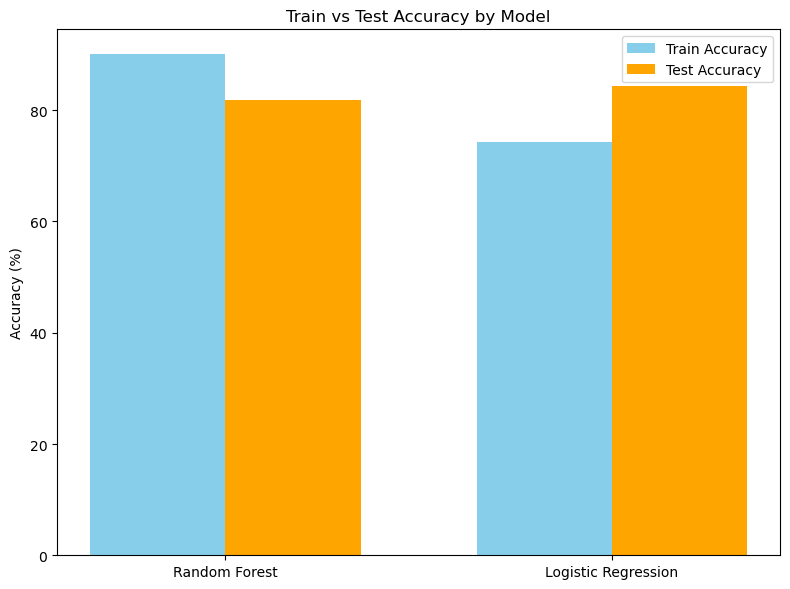

In [52]:
import matplotlib.pyplot as plt

# Accuracy values
rf_train_acc = model.score(X_train_top, y_resampled) * 100
rf_test_acc = model.score(X_test_top, y_test) * 100
log_train_acc = logictic_model.score(X_train_top, y_resampled) * 100
log_test_acc = logictic_model.score(X_test_top, y_test) * 100

# Plotting
models = ['Random Forest', 'Logistic Regression']
train_acc = [rf_train_acc, log_train_acc]
test_acc = [rf_test_acc, log_test_acc]

x = range(len(models))
bar_width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x, train_acc, width=bar_width, label='Train Accuracy', color='skyblue')
plt.bar([p + bar_width for p in x], test_acc, width=bar_width, label='Test Accuracy', color='orange')

plt.xticks([p + bar_width / 2 for p in x], models)
plt.ylabel('Accuracy (%)')
plt.title('Train vs Test Accuracy by Model')
plt.legend()
plt.tight_layout()
plt.show()


In [53]:
#prediction

loan_test = pd.read_csv("/Users/jahna/Downloads/test for loan.csv")
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
loan_test = loan_test.loc[:, prediction_features]
loan_test.head()

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Dependents
0,1.0,5849,NaN,0.0,360.0,0
1,1.0,4583,128.0,1508.0,360.0,1
2,1.0,3000,66.0,0.0,360.0,0
3,1.0,2583,120.0,2358.0,360.0,0
4,1.0,6000,141.0,0.0,360.0,0


In [55]:
loan_test.isnull().sum()


Credit_History       50
ApplicantIncome       0
LoanAmount           22
CoapplicantIncome     0
Loan_Amount_Term     14
Dependents           15
dtype: int64

In [56]:

loan_test = loan_test.dropna(how = 'any')

In [57]:
loan_test.isnull().sum()

Credit_History       0
ApplicantIncome      0
LoanAmount           0
CoapplicantIncome    0
Loan_Amount_Term     0
Dependents           0
dtype: int64

In [58]:
# TODO : Encoding Categorical data into NUmerical Data
loan_test['Dependents'] = loan_test['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

In [59]:
loan_test['Loan_Status_Predicted'] = model.predict(loan_test.values)

C:\Users\jahna\.conda\conda code\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
loan_test.head(10)


,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Dependents,Loan_Status_Predicted
1,1.0,4583,128.0,1508.0,360.0,1,1
2,1.0,3000,66.0,0.0,360.0,0,1
3,1.0,2583,120.0,2358.0,360.0,0,1
4,1.0,6000,141.0,0.0,360.0,0,1
5,1.0,5417,267.0,4196.0,360.0,2,1
6,1.0,2333,95.0,1516.0,360.0,0,1
7,0.0,3036,158.0,2504.0,360.0,3,0
8,1.0,4006,168.0,1526.0,360.0,2,1
9,1.0,12841,349.0,10968.0,360.0,1,1
10,1.0,3200,70.0,700.0,360.0,2,1


In [61]:
loan_test.Loan_Status_Predicted.value_counts()

Loan_Status_Predicted
1    401
0    116
Name: count, dtype: int64